# 1. Introduction to regression

Realicemos una predicción basada en una regresión lineal. 
Se parte de los datos analizados, normalizados y acotados logrados en el punto 0, para el training.

Este método se basa en hacer una predicción basada en regresiones lineales con y sin regularización.

Partiendo de una contrucción del modelo, haremos un proceso iterativo de validación y ajuste del mismo (modificando parámetros y variables), hasta obtener el que mejor predice nuestra target, sin infra o sobreajustes

## Importación de datos y selección de variables


In [3]:
#Librerías a usar

import pandas as pd
import numpy as np

#Importación de datos
data = pd.read_csv("data/PreciosCasas/train_final.csv", sep='\t', encoding='utf-8') 

# print a summary of the data in Melbourne data
data.describe()

Unnamed: 0           Id   MSSubClass        LotArea  OverallQual  \
count  1457.000000  1457.000000  1457.000000    1457.000000  1457.000000   
mean    728.805765   729.805765    56.877145   10460.434454     6.094715   
std     421.402158   421.402158    42.339638    9862.564977     1.376542   
min       0.000000     1.000000    20.000000    1300.000000     1.000000   
25%     364.000000   365.000000    20.000000    7540.000000     5.000000   
50%     729.000000   730.000000    50.000000    9473.000000     6.000000   
75%    1093.000000  1094.000000    70.000000   11600.000000     7.000000   
max    1459.000000  1460.000000   190.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2  \
count  1457.000000  1457.000000   1457.000000  1457.000000  1457.000000   
mean      5.576527  1971.194235   1984.818806   439.128346    46.645161   
std       1.113638    30.190353     20.640669   432.964939   161.471529   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1994.000000   383.000000     0.000000   
75%       6.000000  2000.000000   2004.000000   712.000000     0.000000   
max       9.000000  2010.000000   2010.000000  2188.000000  1474.000000   

               ...            SaleType_ConLw  SaleType_New  SaleType_Oth  \
count          ...               1457.000000   1457.000000   1457.000000   
mean           ...                  0.003432      0.082361      0.002059   
std            ...                  0.058500      0.275008      0.045345   
min            ...                  0.000000      0.000000      0.000000   
25%            ...                  0.000000      0.000000      0.000000   
50%            ...                  0.000000      0.000000      0.000000   
75%            ...                  0.000000      0.000000      0.000000   
max            ...                  1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
count  1457.000000            1457.000000            1457.000000   
mean      0.868909               0.069321               0.002745   
std       0.337616               0.254086               0.052342   
min       0.000000               0.000000               0.000000   
25%       1.000000               0.000000               0.000000   
50%       1.000000               0.000000               0.000000   
75%       1.000000               0.000000               0.000000   
max       1.000000               1.000000               1.000000   

       SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
count           1457.000000           1457.000000           1457.000000   
mean               0.008236              0.013727              0.821551   
std                0.090410              0.116395              0.383022   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              1.000000   
50%                0.000000              0.000000              1.000000   
75%                0.000000              0.000000              1.000000   
max                1.000000              1.000000              1.000000   

       SaleCondition_Partial  
count            1457.000000  
mean                0.084420  
std                 0.278112  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000  

[8 rows x 222 columns]

In [4]:
data.shape

(1457, 222)


### Reescalado

Al contrario que en otros modelos, cuando se aplican modelos de regresión lineal con terminos de penalización (como Lasso o Ridge), debemos tener las variables en la misma escala

In [5]:
data = (data - data.min()) / data.max()
print(data.max().max())
print(data.min().min())


1.0
0.0


In [29]:
#Vamos a ver que variables elegimos: todas como columnas y el SalesPrice como target

X= data.ix[:, data.columns != 'Unnamed: 0']
X= X.ix[:, X.columns != 'SalePrice']

print (X.head())

y= data['SalePrice']

         Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0  0.000000    0.210526  0.033218          0.6     0.444444   0.065174   
1  0.000685    0.000000  0.038561          0.5     0.777778   0.051741   
2  0.001370    0.210526  0.046226          0.6     0.444444   0.064179   
3  0.002055    0.263158  0.038328          0.6     0.444444   0.021393   
4  0.002740    0.210526  0.060210          0.7     0.444444   0.063682   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
0      0.026368    0.322669         0.0   0.064212          ...             
1      0.012935    0.446984         0.0   0.121575          ...             
2      0.025871    0.222121         0.0   0.185788          ...             
3      0.009950    0.098720         0.0   0.231164          ...             
4      0.024876    0.299360         0.0   0.209760          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.

/root/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


## Implementación del modelo de Regresión

Haremos primero una regresión lineal sin regularizar, analizaremos el modelo, y luego iremos probando con los distintos tipos de regularización a ver como lo vamos mejorando.

Para ser capaces de ir validando el modelo, lo separaremos en dos grupos, predictors and target. Lo haremos mediando un split con un número generaro aleatorio. Como queremos que todas las veces que ejecutemos el modelo nos salga lo mismo, estableceremos el argumento de random_state.


In [31]:
#Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


#Separamos los datos en dos grupos, 
train_X, val_X, train_y, val_y = train_test_split( X, y,random_state = 0)


In [35]:
# Modelo de Regresión lineal 
LR = LinearRegression()
LR.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(data.columns[maxcoef[i]], coef[i]))

Functional_Sev........... -6.0368e+09
Functional_Typ........... -6.0368e+09
PavedDrive_N............. -6.0368e+09
Exterior2nd_Wd Shng......  5.3896e+09
Exterior2nd_Wd Sdng......  5.3896e+09


Vemos que el modelo está demasiado sobreajustado

In [37]:
prediccion = LR.predict(val_X)
print(mean_absolute_error(val_y, prediccion))

29656030.3402


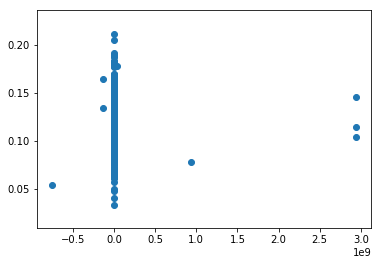

In [38]:
# Veamoslo en un scatter plot
plt.scatter(prediccion,val_y);
plt.show()